## Hierarchical_Clustering

## Que: Perform clustering (hierarchical clustering) for the airlines data to obtain optimum number of clusters. 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

## Importing the Data

In [ ]:
airline= pd.read_csv('/content/EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Understanding

In [ ]:
airline.shape

(3999, 12)

In [ ]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
airline.duplicated().value_counts()

False    3999
dtype: int64

In [ ]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

## Data Preparation

In [ ]:
airline = airline.drop(labels= 'ID#',axis= 1)
airline.head(6)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0


In [ ]:
st_scaler = MinMaxScaler()

In [ ]:
airline_scaler = st_scaler.fit_transform(airline)
airline_scaler = pd.DataFrame(data= airline_scaler, columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])
airline_scaler

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## dendrogram

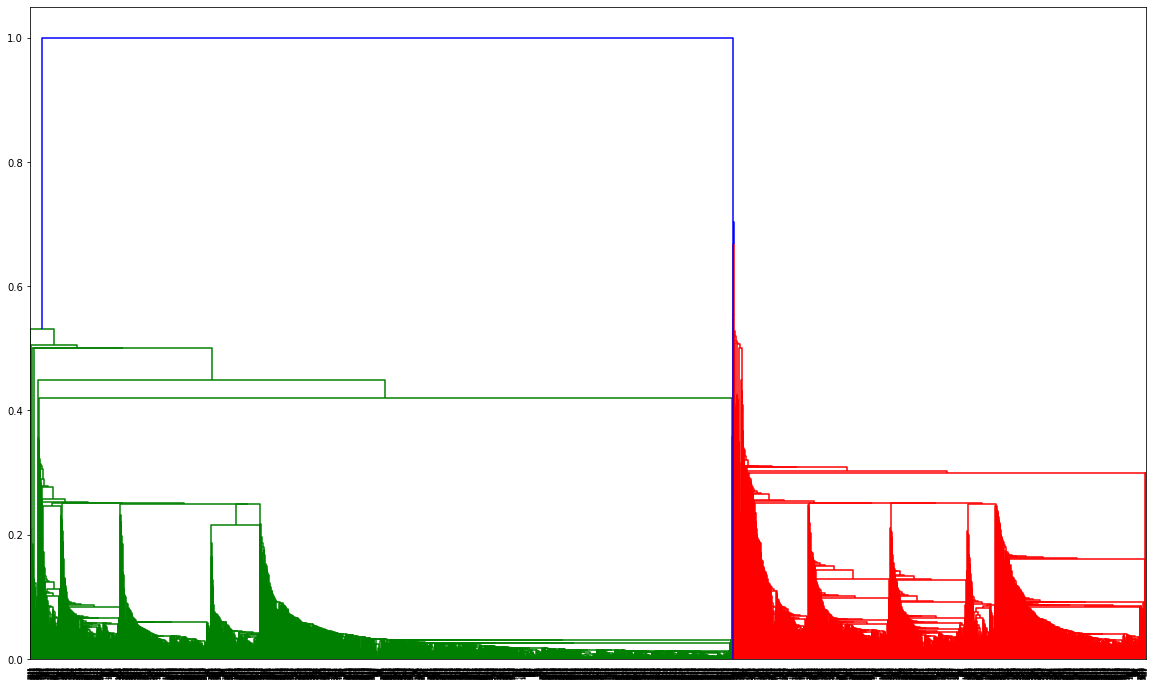

In [ ]:
plt.figure(figsize=(20,12)) 
dend = sch.dendrogram(sch.linkage(airline_scaler,method='single'))

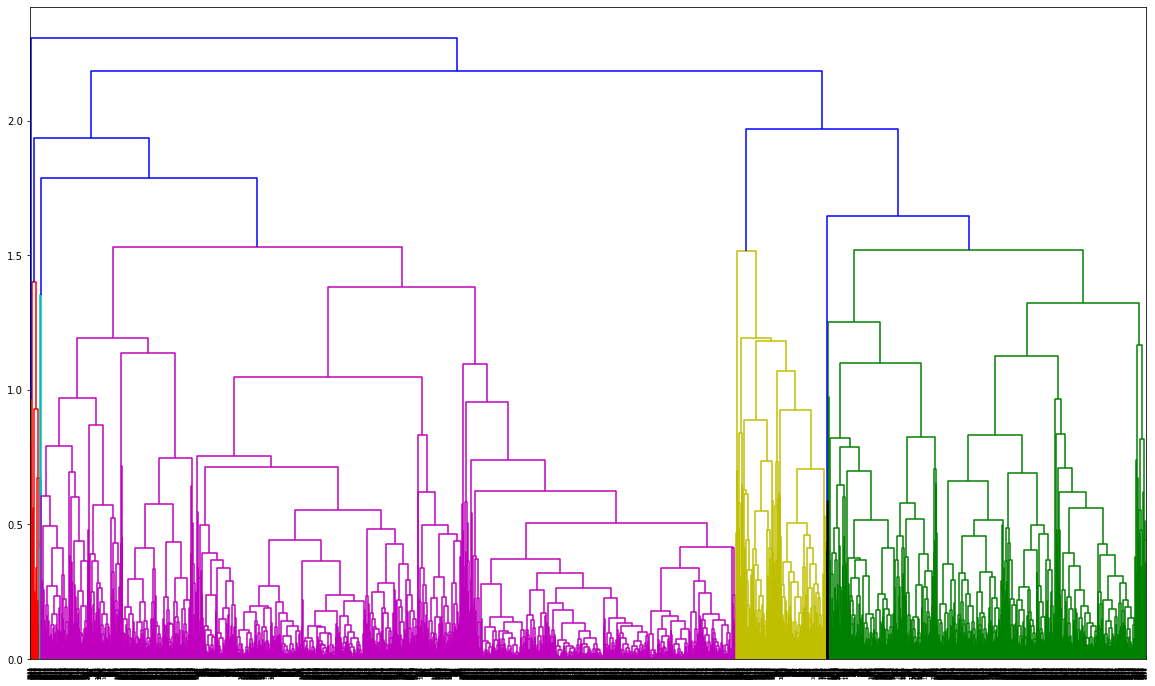

In [ ]:
plt.figure(figsize=(20,12)) 
dend = sch.dendrogram(sch.linkage(airline_scaler,method='complete'))

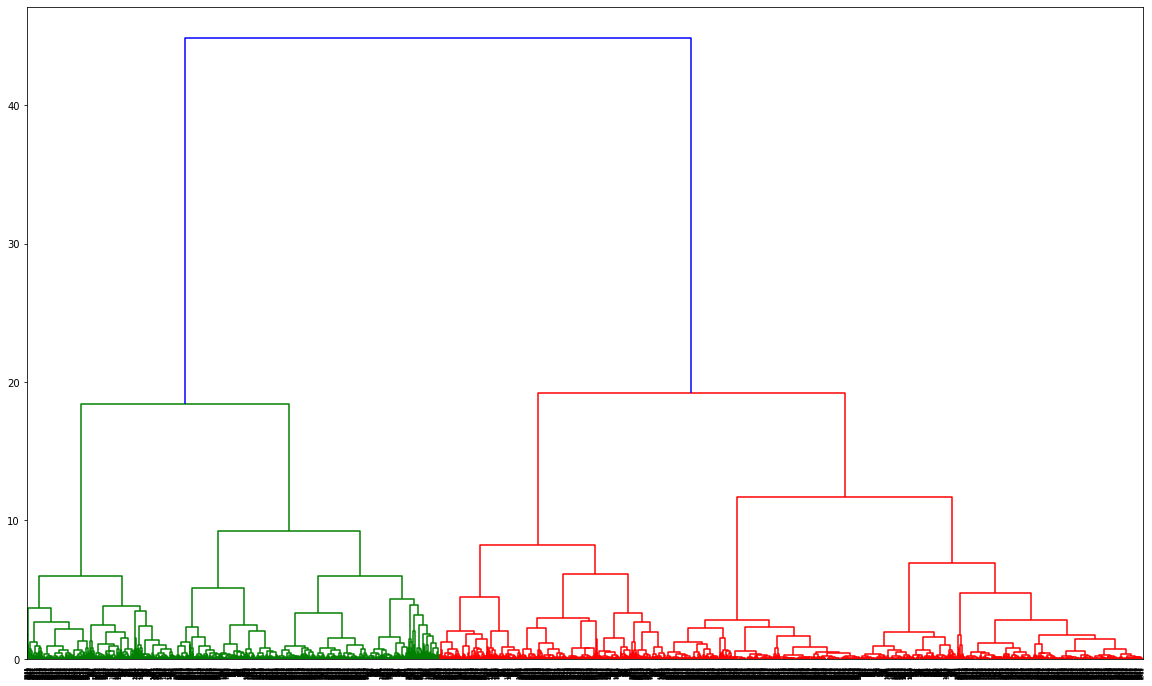

In [ ]:
plt.figure(figsize=(20,12)) 
dend = sch.dendrogram(sch.linkage(airline_scaler,method='ward'))

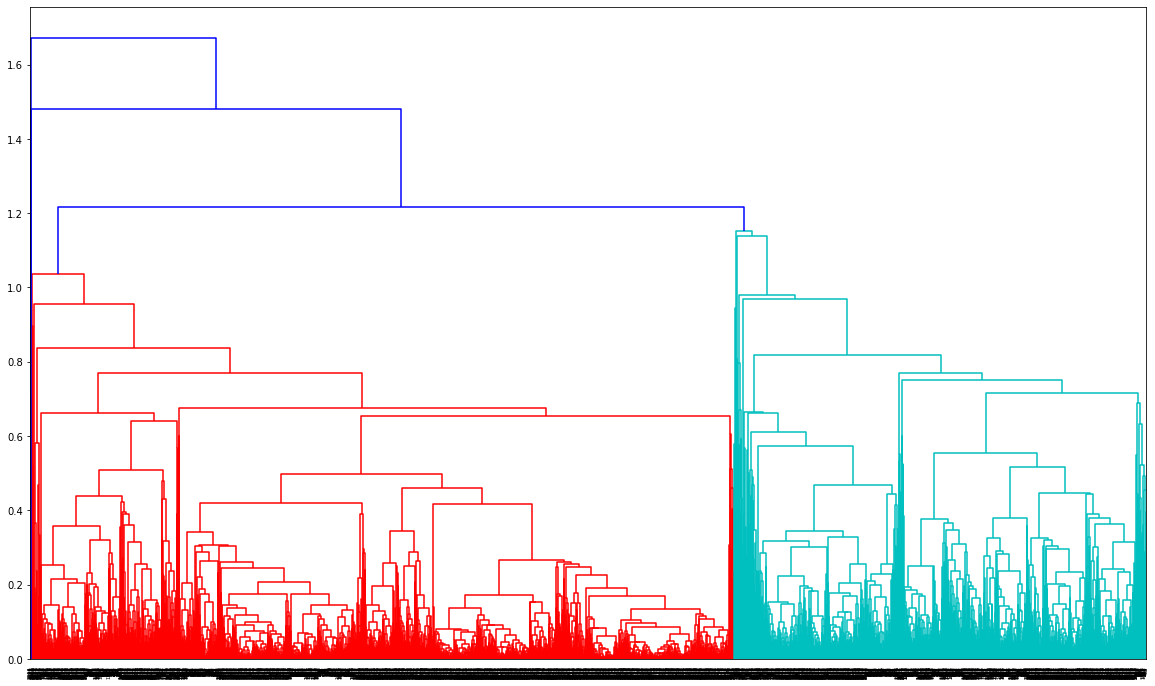

In [ ]:
plt.figure(figsize=(20,12)) 
dend = sch.dendrogram(sch.linkage(airline_scaler,method='average'))

## Model Builing and Model Training

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
hc

AgglomerativeClustering(n_clusters=5)

## Predicting the Values

In [ ]:
y_hc = hc.fit_predict(airline)
y_hc = pd.DataFrame(y_hc,columns= ['clusters'])
y_hc

,clusters
0,2
1,2
2,2
3,2
4,4
...,...
3994,2
3995,4
3996,4
3997,4


In [ ]:
airline['clusters']= y_hc
airline.head(6)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4
5,16420,0,1,1,1,0,0,0,0,6942,0,2


In [ ]:
airline['clusters'].value_counts()

2    2185
4    1030
1     624
3     134
0      26
Name: clusters, dtype: int64

In [ ]:
airline[airline['clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
43,619393,0,3,1,1,15008,14,0,0,7819,1,0
87,609477,0,3,1,1,21422,22,1200,8,6820,0,0
117,969559,0,1,1,1,2500,3,1000,2,7718,1,0
151,930410,0,5,1,1,211284,18,2250,6,7640,1,0
186,707079,0,4,1,1,57173,40,3450,12,7523,1,0
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,0
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,0
290,568174,0,5,1,1,67121,16,1000,2,7243,1,0
313,714717,0,5,1,1,119162,20,1750,4,7183,1,0
318,766419,0,1,1,1,11398,3,398,1,7162,1,0


In [ ]:
airline[airline['clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
20,120576,0,5,1,1,58831,23,250,2,6896,1,1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
24,205651,500,1,1,1,4025,21,700,4,7932,0,1
30,177926,0,3,1,1,20797,13,0,0,7886,0,1
35,123759,0,4,1,1,50572,23,2500,5,7865,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,121156,0,1,1,1,12245,6,1000,2,1538,1,1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3946,139032,0,3,1,1,19565,17,1150,4,1481,0,1
3949,170632,0,1,1,1,4650,3,0,0,1480,0,1


In [ ]:
airline[airline['clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
5,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,2
3992,11181,0,1,1,1,929,12,0,0,1407,0,2
3993,3974,0,1,1,1,365,3,0,0,1397,0,2
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2


In [ ]:
airline[airline['clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,3
32,276571,0,4,1,1,42044,23,0,0,7872,0,3
45,288865,967,1,1,1,23600,14,2000,4,6884,1,3
63,362642,0,1,1,1,28079,8,0,0,6835,0,3
72,550367,0,3,1,1,12500,13,50,1,7801,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3040,449205,1121,1,1,1,4750,9,3250,8,3071,1,3
3137,298505,0,5,1,1,130647,32,600,2,2483,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3315,298927,0,5,1,1,69449,27,150,3,2047,0,3


In [ ]:
airline[airline['clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4
6,84914,0,3,1,1,27482,25,0,0,6994,0,4
9,104860,0,3,1,1,28426,28,1150,3,6931,1,4
11,96522,0,5,1,1,61105,19,0,0,6924,1,4
16,51890,0,4,1,1,48963,16,0,0,6910,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,4
3985,59017,0,4,1,1,34746,25,0,0,1418,0,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4


In [ ]:
airline.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,841016.769231,512.692308,3.346154,1.000000,1.115385,52888.269231,22.346154,1797.807692,6.653846,6447.269231,0.846154
1,1,158510.772436,276.342949,3.035256,1.008013,1.060897,35739.006410,17.153846,851.137821,2.493590,4945.536859,0.483974
2,2,22129.604577,95.710755,1.469565,1.018307,1.000000,7136.640732,8.241190,225.946453,0.712128,3656.610984,0.298398
3,3,355242.694030,424.671642,3.059701,1.022388,1.000000,46811.955224,19.574627,1582.291045,4.835821,5654.537313,0.701493
4,4,75338.683495,120.885437,2.557282,1.009709,1.007767,22349.167961,14.059223,539.990291,1.514563,4338.904854,0.399029


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


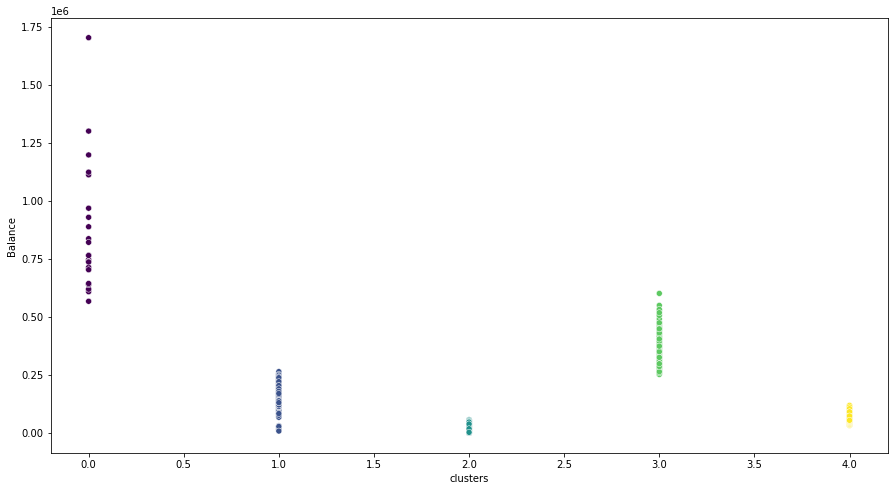

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(airline['clusters'],airline['Balance'],c=hc.labels_) 
plt.show()